<a href="https://colab.research.google.com/github/frankausberlin/notebook-collection/blob/main/environmentnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Environments

## pt, px - PyTorch

<font size='+1'>PyTorch runtime base (pt)</font>
* with google colab, matplotlib, and ipywidgets

```shell
mamba deactivate && \
mamba remove -q -n pt --all && \
mamba create -y -n pt "python=3.9" "jupyterlab<4.0.0" jupyter_http_over_ws matplotlib google-colab "ipywidgets<8.0.0" && \
mamba activate pt && \
jupyter server extension enable --py jupyter_http_over_ws && \
pip install -U "jupyter-server<2.0.0" && \
mamba install -y pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia
```

<font size='+1'>PyTorch runtime extended (px)</font>
* pt clone with:

```shell
mamba deactivate && \
mamba remove -q -n px --all && \
mamba create -y -n px --clone pt && \
mamba activate px && \
pip install -U scikit-learn pandas scipy tqdm fastai fastbook

```



In [ ]:
#@markdown check PyTorch Cuda
import torch
torch.cuda.is_available()


True

## tf, tx - TensorFlow

<font size='+1'>TensorFlow runtime base (tf)</font>
* with google colab and ipywidgets

```shell
mamba deactivate && \
mamba remove -q -n tf --all && \
mamba create -y -n tf "python=3.9" "jupyterlab<4.0.0" jupyter_http_over_ws matplotlib google-colab "ipywidgets<8.0.0" && \
mamba activate tf && \
jupyter server extension enable --py jupyter_http_over_ws && \
pip install -U "jupyter-server<2.0.0" && \
pip install tensorflow[and-cuda]
```

<font size='+1'>TensorFlow runtime extended (px)</font>
* tf clone with:

```shell
mamba deactivate && \
mamba remove -q -n tx --all && \
mamba create -y -n tx --clone tf && \
mamba activate tx && \
pip install -U scikit-learn pandas scipy tqdm opencv-python
```


In [ ]:
#@markdown check TensorFlow Cuda
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## ml, mx - PyTorch & TensorFlow


<font size='+1'>PyTorch & TensorFlow runtime base (ml)</font>
* with google colab and ipywidgets

```shell
mamba deactivate && \
mamba remove -q -n ml --all && \
mamba create -y -n ml "python=3.9" "jupyterlab<4.0.0" jupyter_http_over_ws matplotlib google-colab "ipywidgets<8.0.0" && \
mamba activate ml && \
jupyter server extension enable --py jupyter_http_over_ws && \
pip install -U "jupyter-server<2.0.0" && \
mamba install -y pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia && \
pip install tensorflow[and-cuda]
```

<font size='+1'>PyTorch & TensorFlow runtime extended (mx)</font>
* ml clone with:

```shell
mamba deactivate && \
mamba remove -q -n mx --all && \
mamba create -y -n mx --clone ml && \
mamba activate mx && \
pip install -U scikit-learn pandas scipy tqdm fastai fastbook opencv-python
```


In [ ]:
#@markdown check both Cuda
import torch, tensorflow as tf

print (f"pt-cuda: {torch.cuda.is_available()}, tf-cuda: {':GPU:' in str(tf.config.list_physical_devices('GPU'))}")



pt-cuda: True, tf-cuda: True


##<font size='+2'>start jupyter</font>

**Variation A**: without token - ok at home
* <font color='red' size='+2'>Attention!</font> you have to customize the **notebook-dir** parameter (default is '/content')

* read here: https://stackoverflow.com/questions/42233102/how-to-create-an-insecure-jupyter-server

```shell
jupyter notebook \
  --log-level 30 \
  --notebook-dir="/content" \
  --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=8888 \
  --NotebookApp.port_retries=0 \
  --allow-root \
  --NotebookApp.token='' \
  --NotebookApp.disable_check_xsrf=True
```

**Variation B**: standard with token

```shell
jupyter notebook \
  --log-level 30 \
  --notebook-dir "/content" \
  --NotebookApp.allow_origin='*' \
  --port=8888 \
  --NotebookApp.port_retries=0
```


In [ ]:
#@markdown Run this cell to write a bash script called **jn** in the current folder to start jupyter notebook.
#@markdown * <font color='red' size='+2'>Attention!</font> you have to customize the **notebook-dir** parameter (default is '/content')
#@markdown * Variation A: ```>bash ./jn x```
#@markdown * Variation B: ```>bash ./jn```
%%writefile jn
#!/bin/bash
if [[ $1 = 'x' ]]
then
	echo '!!!ATENTION!!! every one in your network can access your local folder'
	echo 'use http://localhost:8888/ to conncect local runtime'
	jupyter notebook \
	   --log-level 30 \
	   --notebook-dir="/content" \
	   --NotebookApp.allow_origin='https://colab.research.google.com' \
	   --port=8888 --NotebookApp.port_retries=0 \
	   --allow-root \
	   --NotebookApp.token='' \
	   --NotebookApp.disable_check_xsrf=True
else
	echo 'copy the localhost-url with the token and past it to colab when you conncect local runtime'
	jupyter notebook \
	   --log-level 30 \
	   --notebook-dir "/content" \
	   --NotebookApp.allow_origin='*' \
	   --port=8888 \
	   --NotebookApp.port_retries=0
fi


Overwriting jn


# Docker

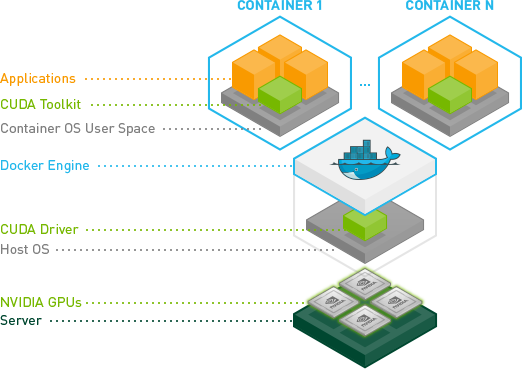

* clean remove docker-ce, docker-desktop and nvidia-docker
>```shell
sudo apt-get purge -y nvidia-docker2
sudo apt-get remove -y docker-desktop
rm -r $HOME/.docker/desktop
sudo rm /usr/local/bin/com.docker.cli
sudo apt-get -y purge docker-desktop
sudo apt-get -y purge docker-engine
sudo apt-get -y autoremove --purge docker-engine
sudo rm -rf /var/lib/docker # This deletes all images, containers, and volumes
rm -rf ~/.docker
sudo find /etc/apt -type f -name *docker* -delete
sudo apt-get update
```

* [install docker desktop](https://docs.docker.com/desktop/install/ubuntu/):
>```shell
sudo apt-get update
sudo apt-get install ca-certificates curl gnupg
sudo install -m 0755 -d /etc/apt/keyrings
curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo gpg --dearmor -o /etc/apt/keyrings/docker.gpg
sudo chmod a+r /etc/apt/keyrings/docker.gpg
echo \
  "deb [arch="$(dpkg --print-architecture)" signed-by=/etc/apt/keyrings/docker.gpg] https://download.docker.com/linux/ubuntu \
  "$(. /etc/os-release && echo "$VERSION_CODENAME")" stable" | \
  sudo tee /etc/apt/sources.list.d/docker.list > /dev/null
sudo apt-get update
sudo apt-get install ./docker-desktop*.deb
```

* [install nvidia toolkit for docker:](https://docs.nvidia.com/datacenter/cloud-native/container-toolkit/1.13.5/install-guide.html)
>```shell
curl -fsSL https://nvidia.github.io/libnvidia-container/gpgkey | sudo gpg --dearmor -o /usr/share/keyrings/nvidia-container-toolkit-keyring.gpg \
  && curl -s -L https://nvidia.github.io/libnvidia-container/stable/deb/nvidia-container-toolkit.list | \
    sed 's#deb https://#deb [signed-by=/usr/share/keyrings/nvidia-container-toolkit-keyring.gpg] https://#g' | \
    sudo tee /etc/apt/sources.list.d/nvidia-container-toolkit.list \
  && \
    sudo apt-get update
sudo apt-get install -y nvidia-container-toolkit
sudo nvidia-ctk runtime configure --runtime=docker
sudo systemctl restart docker
sudo nvidia-ctk runtime configure --runtime=containerd
sudo systemctl restart containerd
```


In [ ]:
#@markdown <font size='+2'>check nvidia toolkit</font> (cuda in container)<br>
#@markdown run a container with:<br>
#@markdown > ```sudo docker run --rm --runtime=nvidia --gpus all ubuntu nvidia-smi```

import getpass, os

command  = "sudo -S docker run --rm --runtime=nvidia --gpus all ubuntu nvidia-smi" # -S enables input from stdin
password = getpass.getpass(prompt=f'Run the cell executes the command (needs sudo-pw):\n  >')
os.system ('echo %s | %s' % (password, command))


Run the cell executes the command (needs sudo-pw):
  >··········


[sudo] Passwort für frank: 

Mon Nov  6 21:26:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti      On | 00000000:2D:00.0 Off |                  N/A |
|  0%   50C    P8               16W / 200W|    287MiB /  8192MiB |     23%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

0

# shell

In [2]:
#@markdown command shell { form-width: "300px" }
#@markdown * using [jQuery Terminal](https://terminal.jcubic.pl/) - example on [github](https://github.com/alessandrobessi/colab-shell)
#
%matplotlib inline
import                            os
from   google.colab       import  output                # for register callback
from   IPython.display    import  display, HTML, JSON   # draw the shell box with IPython
from   subprocess         import  getoutput             # to exectute command and get output
from   ipywidgets         import  Accordion, Textarea   # used for history

width  = 1000 #@param {type: "slider", min: 400, max: 1200, step: 100}
height = 400 #@param {type: "slider", min: 100, max: 800, step: 100}
printHistory = True #@param {type:"boolean"}


# function for invoke-callback-mechanism
def shell(command):
  global taHistory, acHistory
  # put command to history textarea and set accordion title
  if printHistory:
    taHistory.value += command + '\n'
    acHistory.set_title (0,f'history - last command: {command.split(" ")[0]}')

  # catch cd-command
  if command.startswith('cd'):
    path = command.strip().split(maxsplit=1)[1]
    os.chdir(path)
    return JSON([''])

  # all other commands
  return JSON([getoutput(command)])

# register to invoke
output.register_callback('shell', shell)

# create command tab using javascript with 'display(HTML(...'
display(HTML('''
  <div id=term_demo></div>
  <script src="https://code.jquery.com/jquery-latest.js"></script>
  <script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
  <link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
  <script>
    $('#term_demo').terminal(async function(command) {
        if (command !== '') {
            try {
                let res = await google.colab.kernel.invokeFunction('shell', [command])
                let out = res.data['application/json'][0]
                this.echo(new String(out))
            } catch(e) {
                this.error(new String(e));
            }
        } else {
            this.echo('');
        }
    }, {
        greetings: 'Welcome to Colab Shell',
        name: 'colab_shell',
        height: '''+str(height)+''',
        width: '''+str(width)+''',
        prompt: 'colab > '
    });
  </script>'''))

# History
taHistory = Textarea (layout={'width':'auto', 'height':'200px'})
acHistory = Accordion (children=[taHistory])
acHistory.set_title (0,'history - click to expand')
acHistory.selected_index = None
if printHistory:
  display (acHistory)

Accordion(children=(Textarea(value='', layout=Layout(height='200px', width='auto')),), selected_index=None, _t…